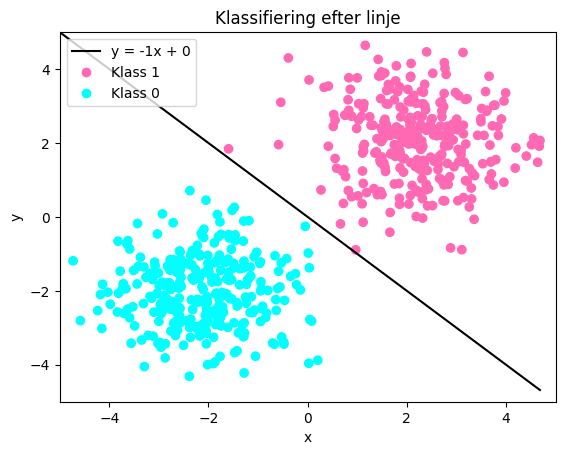

In [7]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd



k = -1
m = 0

def classify_datapoints(x, y, k, m):
    line_y = k * x + m
    return 1 if y > line_y else 0


def plot_classify(data, k, m):
    colors = data["label"].map({0: "cyan", 1:"hotpink"})
    plt.scatter(data["x"], data["y"], c = colors)

    x_vals = sorted(data["x"])
    y_vals = [k * x + m for x in x_vals]
    plt.plot(x_vals, y_vals, color = "black", label = f"y = {k}x + {m}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Klassifiering efter linje")
    klass1 = mlines.Line2D([], [], color='hotpink', marker='o', linestyle='None', label='Klass 1')
    klass0 = mlines.Line2D([], [], color='cyan', marker='o', linestyle='None', label='Klass 0')
    plt.legend(handles=[klass1, klass0], loc='upper left')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend(handles=[plt.Line2D([], [], color='black', label=f"y = {k}x + {m}"), klass1, klass0], loc='upper left')
    plt.show()



if __name__=="__main__":

    filename = "unlabelled_data.csv"

    data = pd.read_csv(filename)

    data.columns = ["x", "y"]
    data["label"] = data.apply(lambda row: classify_datapoints(row["x"], row["y"], k, m), axis=1)

    data.to_csv("labelled_data.csv",index=False)

    plot_classify(data, k, m)
